# Python para Análise de Dados - Pandas  02

<p> Iremos trabalhar com base de imóveis que obtive no site Kaggle. 

Você pode fazer Download diretamente no nosso **GitHub**, [aqui](https://github.com/minerandodados/mdrepo/blob/master/kc_house_data.csv)



In [1]:
# Importe a biblioteca pandas
import pandas as pd

In [2]:
# Lendo a base de dados
arquivo = './kc_house_data.csv'
dataset = pd.read_csv(arquivo, sep=',')

In [3]:
# Plota um Histograma com a coluna Price com 30 bins na cor vermelho

dataset['price'].hist(bins=80, color='red')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024B5EF0E248>,
      dtype=object)

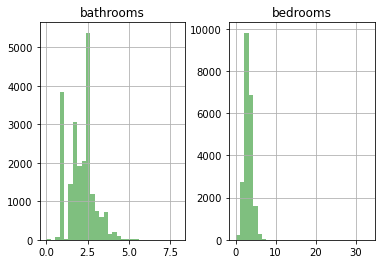

In [4]:
# Plota histogramas das colunas bedrooms e bathrooms lado a lado na cor verde.
dataset[['bedrooms','bathrooms']].hist(bins=30,alpha=0.5,color='Green')

** Estatistica Descritiva**

In [5]:
# Imprime o valor médio da coluna bedrooms
dataset['bedrooms'].mean()

3.3709102688694523

In [6]:
# Imprime o valor máximo da coluna bedrooms
dataset['bedrooms'].max()

33.0

In [7]:
# Imprime o valor mínimo da coluna bedrooms
dataset['bedrooms'].min()

0.0

In [8]:
# Imprime o desvio padrão da coluna bedrooms
dataset['bedrooms'].std()

0.9300844679399579

In [12]:
# Imprime o valor máximo da coluna bedrooms
dataset['bedrooms'].skew()

1.9744391609000942

In [13]:
# Esse método retorna o valor de simetria de cada coluna do dataset.
# Um valor zero indica uma distribuição simétrica
# Um valor maior que zero ou menor indica uma distribuição assimétrica.
# Valores acima de zero podemos dizer que existe uma assimetria positiva 
# Valores abaixo de zero uma assimetria negativa.
# Isso quer dizer que valores muito acima de zero indicam que existem mais valores acima da média
# valores abaixo de zero significa que contém mais valores abaixo da média.
dataset.skew()

id                0.243329
price             4.024069
bedrooms          1.974439
bathrooms         0.511108
sqft_living       1.471555
sqft_lot         13.060019
floors            0.616107
waterfront       11.385108
view              3.395750
condition         1.032805
grade             0.771103
sqft_above        1.446664
sqft_basement     1.577965
yr_built         -0.469805
yr_renovated      4.549493
zipcode           0.405661
lat              -0.485270
long              0.885053
sqft_living15     1.108181
sqft_lot15        9.506743
dtype: float64

# **Extraindo Insights**

* Vamos agora trabalhar com um tipo de gráfico muito interessante.

* Os gráficos do tipo Boxplot são excelentes ferramentas de análise de dados, principalmente para identificar _**outliers**_.

In [ ]:
import matplotlib

In [ ]:
# Plota gráfico do tipo Boxplot da coluna bedrooms
# Esse gráfico é muito rico e é possível visualizar Outliers
%matplotlib notebook
matplotlib.style.use('ggplot')

dataset.boxplot(column='bedrooms')

In [ ]:
# Visualizando os estilos de layout disponível
matplotlib.style.available

In [ ]:
# Plota boxplot da coluna 'price' por número de quartos
%matplotlib notebook
dataset.boxplot(column='price', by='bedrooms')

**Correlação **

In [ ]:
# Imprime a correlação de todas as colunas do dataframe (person)
dataset.corr()

In [ ]:
dataset.corr('spearman')

In [ ]:
# Imprime a correlação de spearman (esta leva em consideração a correção positiva e negativa)
dataset.corr('spearman')

In [ ]:
# Imprime a correção de algumas colunas
dataset[['bedrooms','bathrooms','sqft_living','floors','waterfront','grade','price']].corr()

In [ ]:
# Plotando a correlação de algumas colunas
%matplotlib notebook
dataset[['sqft_living','waterfront','grade','price']].corr().plot()

# **Tabelas Pivot**

In [ ]:
# Tabelas Pivot são úteis para fazer agrupamento nos dados.
# Conta a quantidade de imóveis agrupados pelas colunas waterfront e floors.
# O parametro index informo as colunas que serão usadas para agregação.
# o parâmetro aggfunc é usado para definir a função de agregação, que poderia ser uma média por exemplo.
# O parâmetro margins=True calcula a quantidade total no final da tabela.

# Muito interessante a performance dessa operação.
dataset.pivot_table('id',index=["waterfront","floors"], aggfunc='count',margins=True)

**Crosstab**

In [ ]:
# Crosstab ou tabulação Cruzada
# Essa funcionalidade cruza valores das variáveis
# Nesse exemplo podemos ver qual a distribuição dos imóvies por número de quartos com relação a sua condição
# Podemos ver que imoveis com 3 quartos estão mais na condição 5

pd.crosstab(dataset['bedrooms'],dataset['condition'])

In [ ]:
# Plota a tabulação Cruzada
# Usamos o método plot com um gráfico de barras

table = pd.crosstab(dataset['bedrooms'],dataset['condition'])
table.plot(kind='bar',width=1.0, color=['red','yellow','orange','blue','green'], title='Condition by Bedrooms' ,grid=False)

# ** Trabalhando com Excel **

* Com o Pandas podemos trabalhar com o Excel.

* Isso é muito bom, pois, sabemos que temos muita informação nos dias de hoje em planilhas do excel.

* Diante disso você pode usar o pandas para manipular planilhas do excel e até mesmo gerar novas planilhas a partir de outros dados.

In [ ]:
# Lendo uma planilha do excel no Pandas.
dataframe_excel = pd.read_excel('Controle-de-Atividades-2.0.xlsx', sheetname=0,header=1)

In [ ]:
dataframe_excel.head()

In [ ]:
# Lendo o arquivo indexando pela coluna 'Estado Atual'

file = 'Controle-de-Atividades-2.0.xlsx'
dataframe_excel = pd.read_excel(file, sheetname=0, header=1, index_col=3)

In [ ]:
dataframe_excel.head(10)

In [ ]:
# Ordenando o dataframe pela coluna de índice. 
dataframe_excel.sort_index()

# ** Gerando Planilhas a partir de Dataframes **


In [ ]:
# Vou usar o dataset de imoveis para gerar uma planilha.
dataset.head()

In [ ]:
# Gerando uma planilha com algumas colunas
colunas = ['id','price','bedrooms','bathrooms','sqft_living','floors','waterfront']
dataset[colunas].head()

In [118]:
# Escrevendo no disco a planilha sem o valor do índice.
dataset[colunas].to_excel('planilha_pandas.xls',index=False)

Exception ignored in: <function Comm.__del__ at 0x000001F27188B168>
Traceback (most recent call last):
  File "C:\Users\guilherme.angelico\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\comm\comm.py", line 76, in __del__
    self.close()
  File "C:\Users\guilherme.angelico\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\comm\comm.py", line 116, in close
    self.kernel.comm_manager.unregister_comm(self)
  File "C:\Users\guilherme.angelico\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\comm\manager.py", line 56, in unregister_comm
    comm = self.comms.pop(comm.comm_id)
KeyError: ('a537f2a839c141f1bfaf23d85a14fe74',)
Exception ignored in: <function Comm.__del__ at 0x000001F27188B168>
Traceback (most recent call last):
  File "C:\Users\guilherme.angelico\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel\comm\comm.py", line 76, in __del__
    self.close()
  File "C:\Users\guilherme.angelico\AppData\Local\Continuum\anaconda3\lib\site-

KeyboardInterrupt: 